In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
import pandas as pd
import pickle
from LSTM_training import LSTM_Model, SeqDataset, create_windows
import matplotlib.pyplot as plt


PATH = 'best_model.pt'

### Set up the test data (2021)

In [2]:
X_labels = ['Zweirad', 'Personenwagen', 'Lastwagen', 'Hr', 'RainDur', 'T', 'WVs', 'StrGlo', 'p', "AQI"] 
y_label = "AQI"

data = pd.read_csv('../processed_data/full_data_imputed_with_EAQI.csv')

data = data.loc[data["Jahr"]== 2021]

X_data = data[X_labels]
y_data = data[y_label]
X, y = create_windows(X_data, y_data, 48)

test_data = SeqDataset(X, y)

loaded_data = DataLoader(test_data, batch_size=1, shuffle=False)


In [3]:
model = LSTM_Model()
model.load_state_dict(torch.load(PATH))

model = model.to(torch.double)

model.eval()

y_pred = []
y_true = []
with torch.no_grad():
    for j, (xi, yi) in enumerate(loaded_data):
        y_predicted = model(xi)
        y_pred.append(np.argmax(y_predicted.numpy()))
        y_true.append(np.argmax(yi.numpy()))

# with open('saved_stats.pkl', 'rb') as f:
#     stats = pickle.load(f)

c:\Users\Luca\anaconda3\envs\data_science\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [4]:
score = accuracy_score(y_true, y_pred)
print(score)


0.9379103789885957


Text(0.5, 56.5, 'Predicted EAQI')

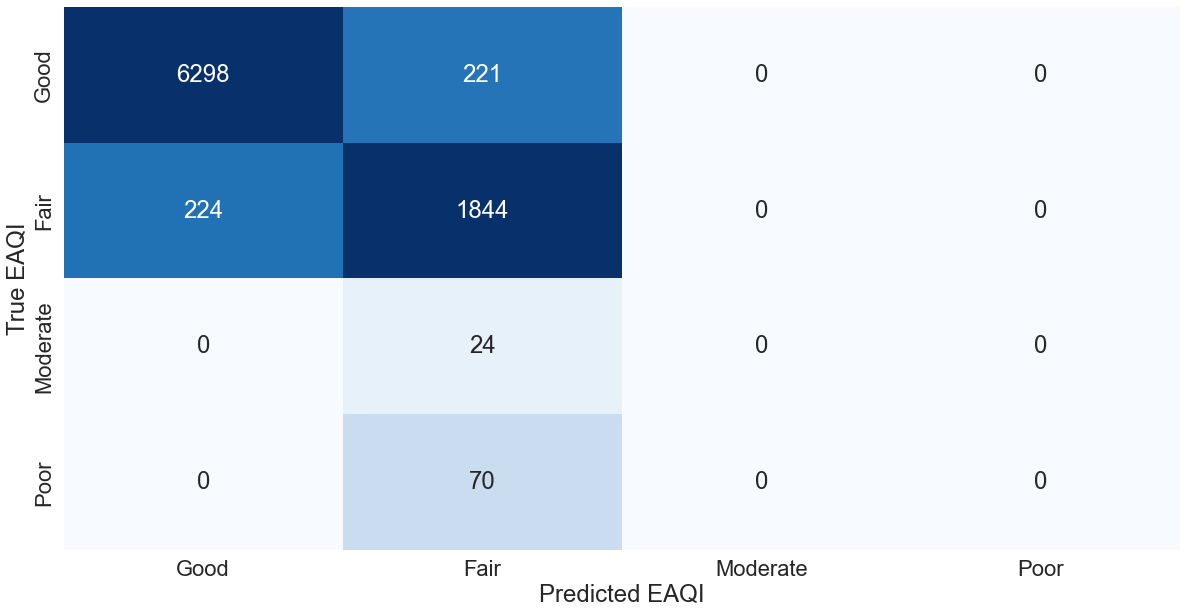

In [5]:
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = ["Good","Fair","Moderate","Poor"],
                  columns = ["Good","Fair","Moderate","Poor"],)
sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.heatmap(df_cm, annot=True, fmt="", cmap='Blues', cbar=False, vmax=300)
plt.ylabel('True EAQI')
plt.xlabel('Predicted EAQI')


[67398, 53668, 4510, 2866, 1]
    Good   Fair  Moderate  Poor  Very Poor
0  67398  53668      4510  2866          1


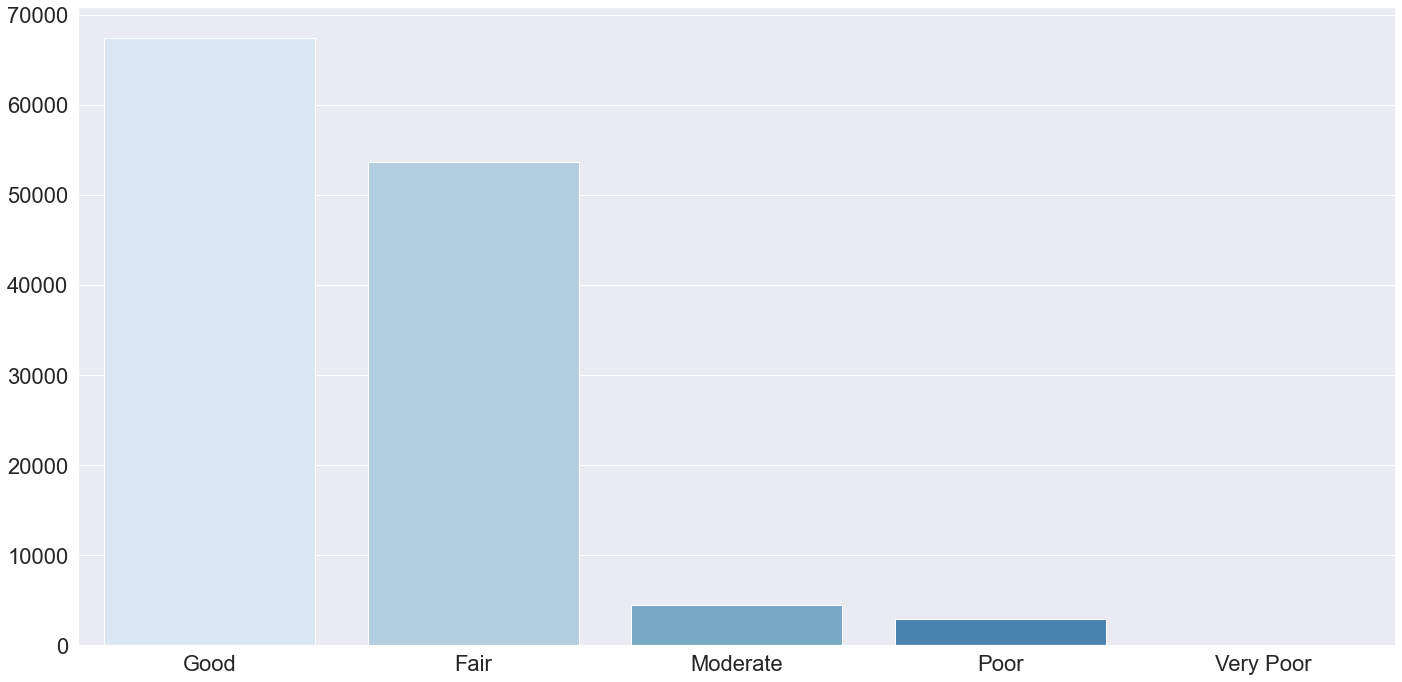

In [7]:



X_labels = ['Zweirad', 'Personenwagen', 'Lastwagen', 'Hr', 'RainDur', 'T', 'WVs', 'StrGlo', 'p', "AQI"] 
y_label = "AQI"

data = pd.read_csv('../processed_data/full_data_imputed_with_EAQI.csv')


aqi = data[y_label]
aqi2 = data.groupby(y_label).count()["Jahr"].to_numpy()
print(list(aqi2))
aqi_df = pd.DataFrame([list(aqi2)], columns = ["Good","Fair","Moderate","Poor", "Very Poor"])
print(aqi_df)
sns.set(font_scale=2)
sns.catplot(data = aqi_df, kind="bar", palette="Blues", height=10, aspect=20/10)


In [2]:
from torchsummary import summary
model = LSTM_Model()
model = model.double()

from torch.utils.tensorboard import SummaryWriter
summary(model, input_size=(48,10))


writer=SummaryWriter('/content/logsdir')


c:\Users\Luca\anaconda3\envs\data_science\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


AttributeError: 'tuple' object has no attribute 'size'